In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
%matplotlib inline

In [49]:
sns.set_style('whitegrid')

In [50]:
from sklearn.datasets import load_boston
boston = load_boston()

In [51]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [52]:
df = pd.DataFrame(boston.data)

In [53]:
"""Lets add the columns to the dataframe"""
df.columns = boston.feature_names

In [54]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [56]:
"""Let's see if the target is the same size as our dataframe"""
print(boston.target.shape)

(506,)


In [59]:
"""The MPRICE field will be what we are trying to predict, which is the median price"""
df['MPRICE'] = boston.target

In [60]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MPRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
""" Let's check if any of the data is missing"""
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MPRICE     0
dtype: int64

In [62]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MPRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
"""We can see that ZN and CHAS both have quartiles that suggest they may not be useful to
predicting the median price value. We can also see the median price value is capped at 50"""

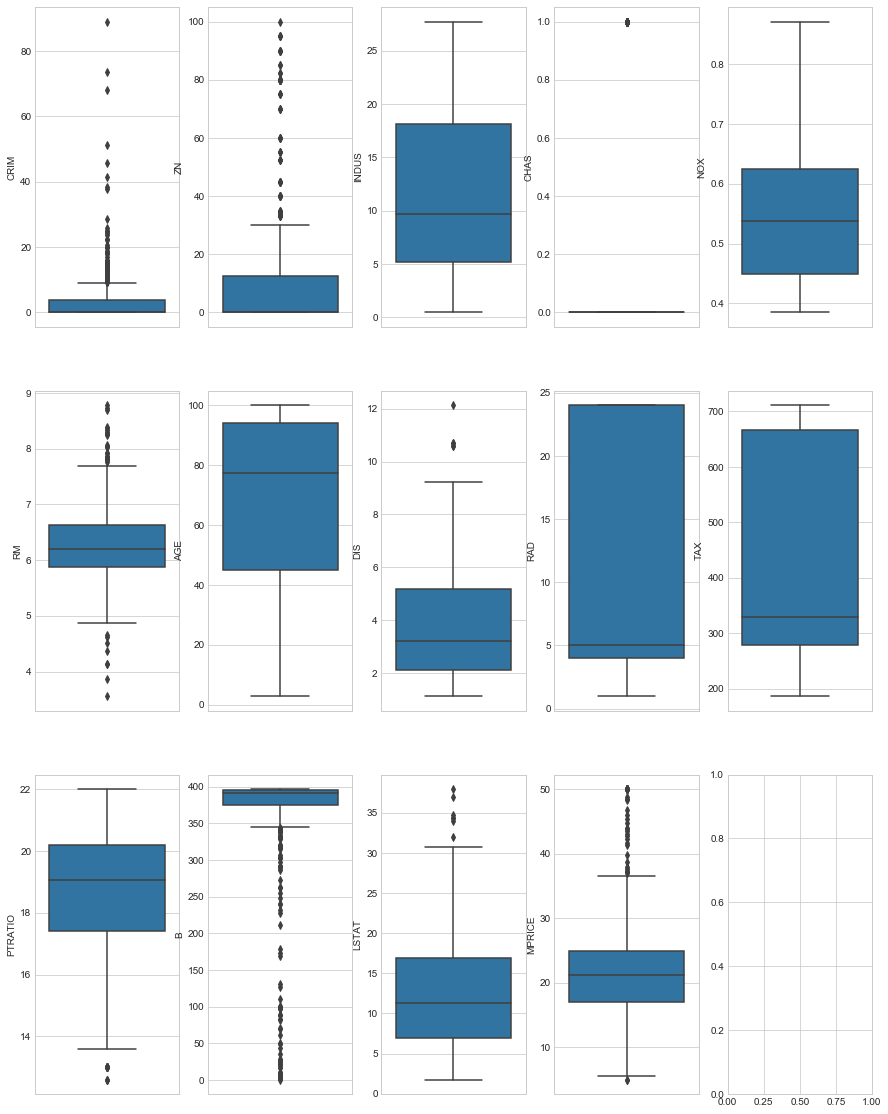

In [143]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 20))
counter = 0
ax = ax.flatten()
for i,j in df.items():
    sns.boxplot(y=i, data=df, ax=ax[counter])
    counter = counter + 1
plt.show()

In [ ]:
"""We can see a large amount of outliers for CRIM, ZN, RM, B, and MPRICE"""

C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

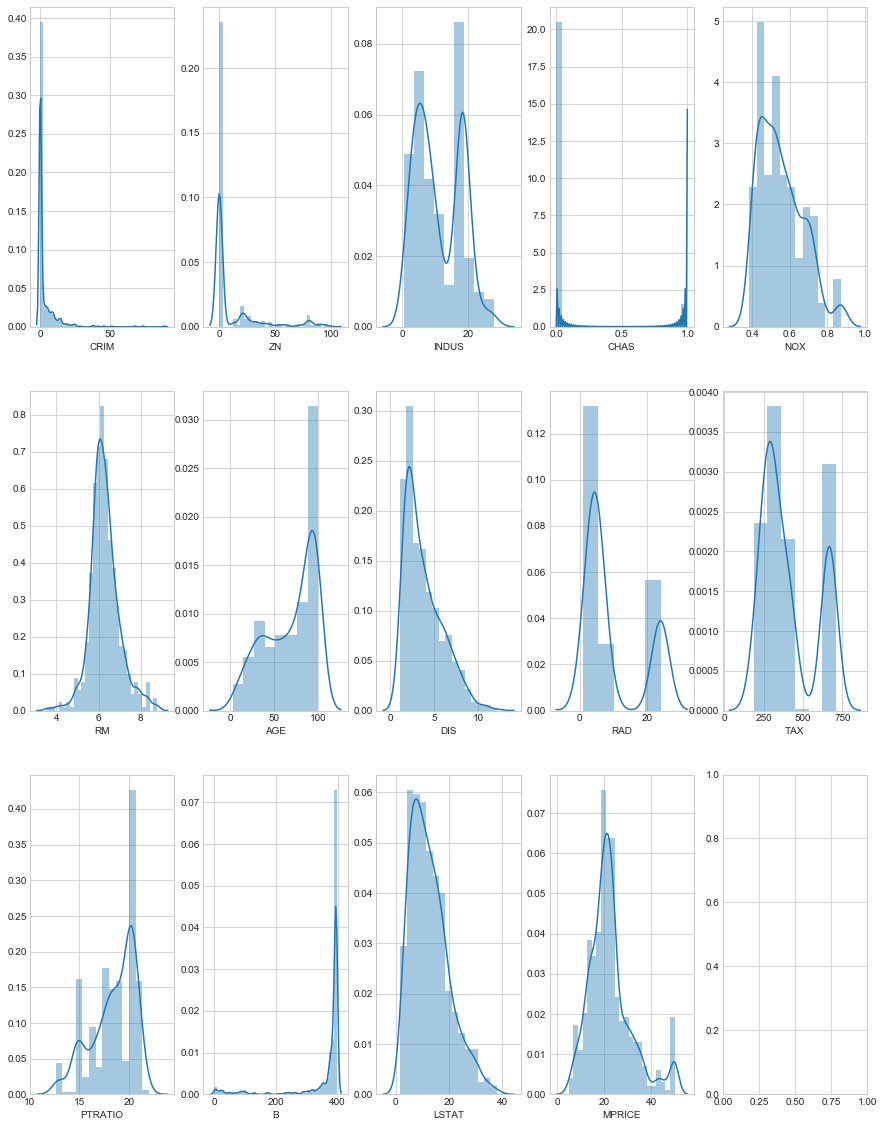

In [144]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 20))
counter = 0
ax = ax.flatten()
for i,j in df.items():
    sns.distplot(j, ax=ax[counter])
    counter = counter + 1
plt.show()

In [ ]:
"""The distributions of CRIM, ZN, CHAS and B are highly skewed. CHAS is likely
not important. We can see our target has a normal distribution"""

C:\Users\Aaron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


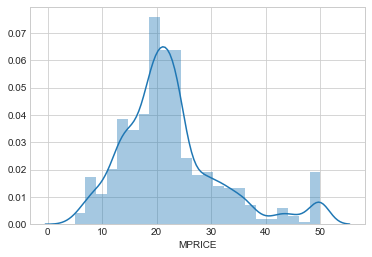

In [145]:
sns.distplot(df['MPRICE'])

In [162]:
df = df[~(df['MPRICE'] >= 50.0)]

In [163]:
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MPRICE
CRIM,1.000000,-0.198043,0.405874,-0.063658,0.416974,-0.220194,0.351736,-0.380387,0.623869,0.580430,0.285369,-0.376750,0.458346,-0.447428
ZN,-0.198043,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
INDUS,0.405874,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
CHAS,-0.063658,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
NOX,0.416974,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
RM,-0.220194,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
AGE,0.351736,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
DIS,-0.380387,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
RAD,0.623869,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
TAX,0.580430,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


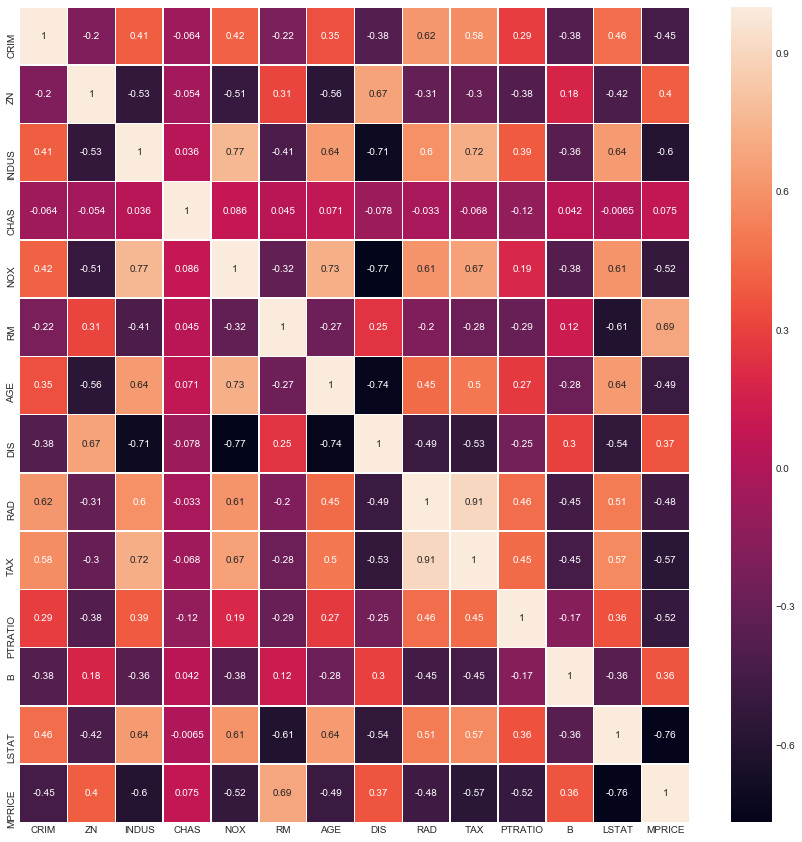

In [164]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005ECDA39550>,
      dtype=object)

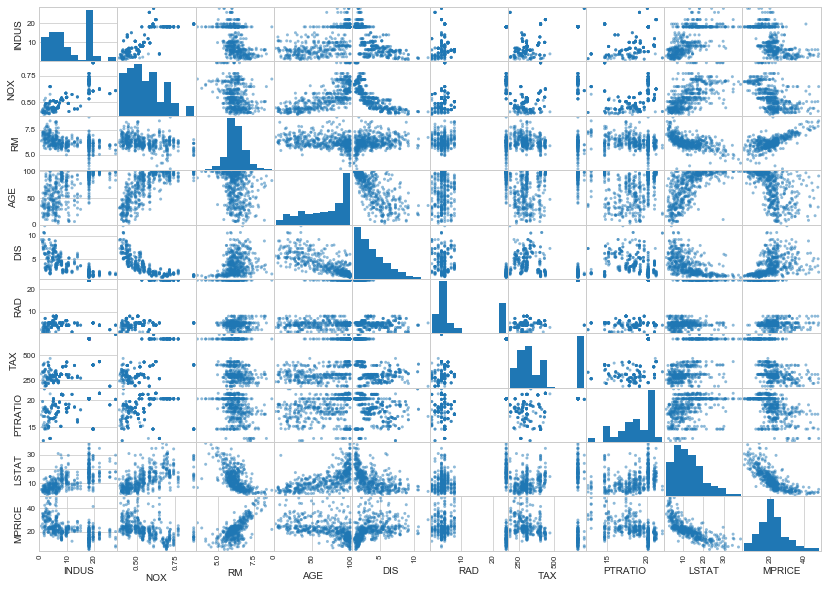

In [165]:
from pandas.plotting import scatter_matrix
scatter_df = df.drop(['CHAS', 'CRIM', 'ZN', 'B'], axis=1)
scatter_matrix(scatter_df, figsize=(14,10))

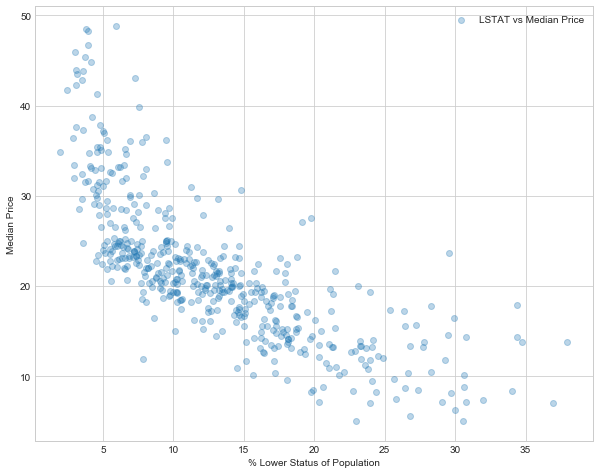

In [166]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['LSTAT']
y = df['MPRICE']
plt.scatter(x,y, label='LSTAT vs Median Price', alpha=0.3)
plt.xlabel('% Lower Status of Population')
plt.ylabel('Median Price')
plt.legend()
plt.show()

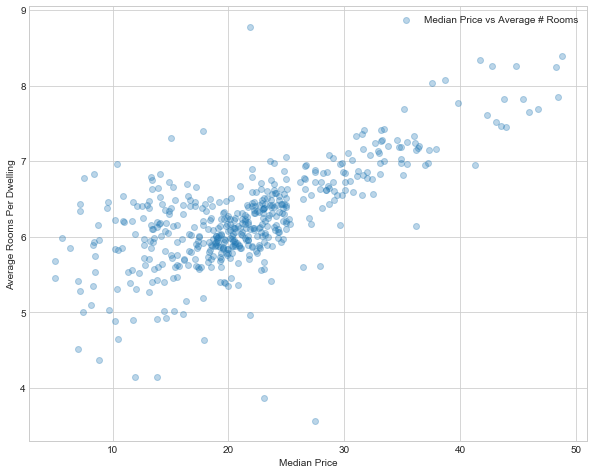

In [167]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['MPRICE']
y = df['RM']
plt.scatter(x,y, label='Median Price vs Average # Rooms', alpha=0.3)
plt.xlabel('Median Price')
plt.ylabel('Average Rooms Per Dwelling')
plt.legend()
plt.show()

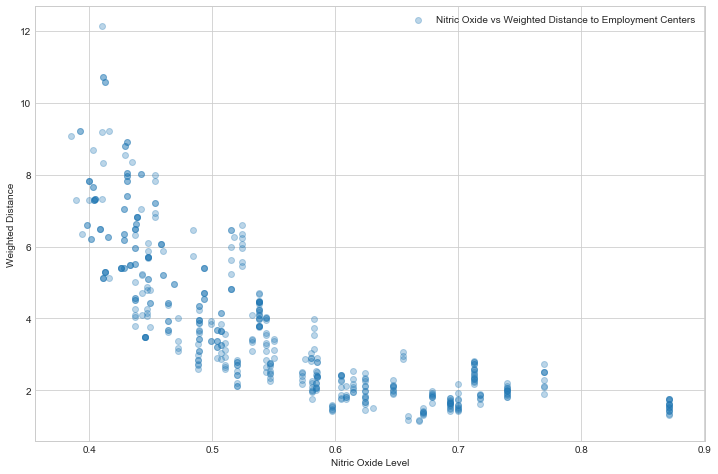

In [168]:
fig, ax = plt.subplots(figsize=(12,8))
x = df['NOX']
y = df['DIS']
plt.scatter(x,y, label='Nitric Oxide vs Weighted Distance to Employment Centers', alpha=0.3)
plt.xlabel('Nitric Oxide Level')
plt.ylabel('Weighted Distance')
plt.legend()
plt.show()

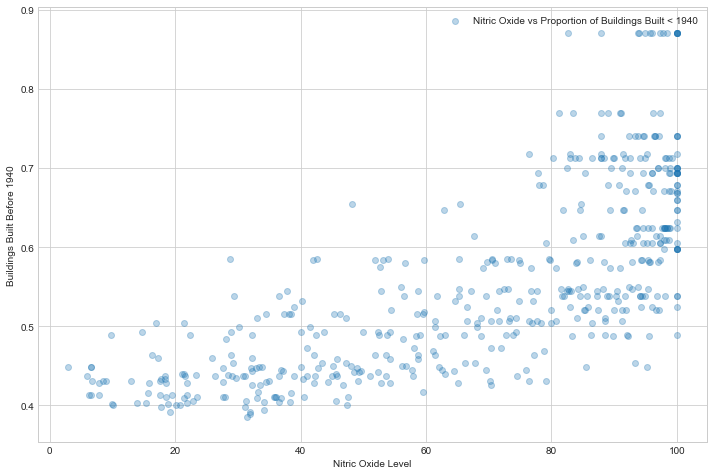

In [169]:
fig, ax = plt.subplots(figsize=(12,8))
x = df['AGE']
y = df['NOX']
plt.scatter(x,y, label='Nitric Oxide vs Proportion of Buildings Built < 1940', alpha=0.3)
plt.xlabel('Nitric Oxide Level')
plt.ylabel('Buildings Built Before 1940')
plt.legend()
plt.show()

In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.copy() # preserve original df as it is
df_scaled = df_scaled.drop(['B', 'CHAS', 'ZN', 'CRIM', 'MPRICE'], axis=1) #drop low corr columns

x = df_scaled.loc[:,:]
y = df['MPRICE']

x = scaler.fit_transform(x) #returns a numpy array

In [208]:
"""Putting transformed data into a dataframe"""
x = pd.DataFrame(data=x, columns=[df_scaled.columns])

In [209]:
"""Removing right skewness of the data"""
y = np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew() > 0.8):
        x[col] = np.log1p(x[col])

In [210]:
x.head()

,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.058148,0.314815,0.577505,0.641607,0.238001,0.000000,0.208015,0.287234,0.080064
1,0.234444,0.172840,0.547998,0.782698,0.299010,0.042560,0.104962,0.553191,0.181441
2,0.234444,0.172840,0.694386,0.599382,0.299010,0.042560,0.104962,0.553191,0.055397
3,0.053333,0.150206,0.658555,0.441813,0.370303,0.083382,0.066794,0.648936,0.026325
4,0.053333,0.150206,0.687105,0.528321,0.370303,0.083382,0.066794,0.648936,0.089001


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, x, y, cv=10, scoring='neg_mean_squared_error')
print("MSE: %0.2f, STD: %0.2f" % (scores.mean(), scores.std()))

MSE: -0.04, STD: 0.04


In [220]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, x, y, cv=10, scoring='neg_mean_squared_error')
print("MSE: %0.2f, STD: %0.2f" % (scores.mean(), scores.std()))

MSE: -0.04, STD: 0.04


In [230]:
from sklearn.linear_model import Lasso

lasso = Lasso()
scores = cross_val_score(lasso, x, y, cv=10, scoring='neg_mean_squared_error')
print("MSE: %0.2f, STD: %0.2f" % (scores.mean(), scores.std()))

MSE: -0.15, STD: 0.11
